<a href="https://colab.research.google.com/github/Ting-Wei-Chang626/Primary_AI/blob/main/demo_basic/demo_audio_processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Load neccessary module

In [4]:
import librosa # a python library to perform audio processing
import librosa.display
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import wave

Connect to google drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Display the wave plot

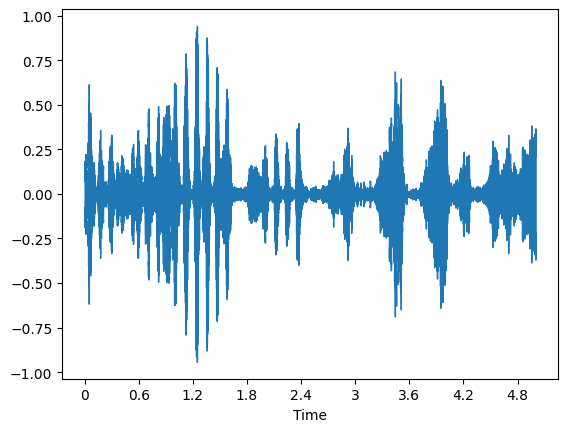

In [28]:
file_path = "/content/drive/MyDrive/NTUCE_AI_worshop_0629/1-18757-A-4.wav"
wav, sr = librosa.load(file_path)
librosa.display.waveshow(wav)

Get the spectrogram of audio

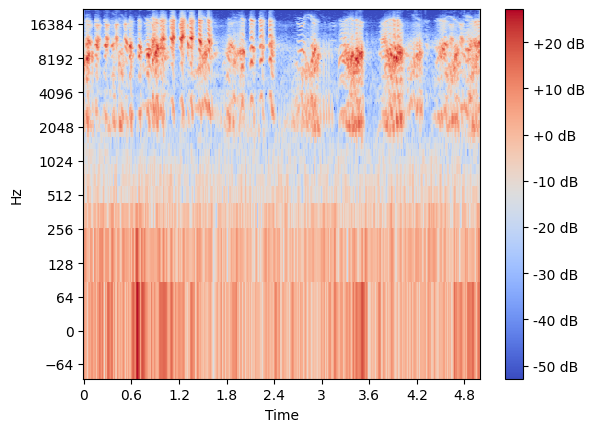

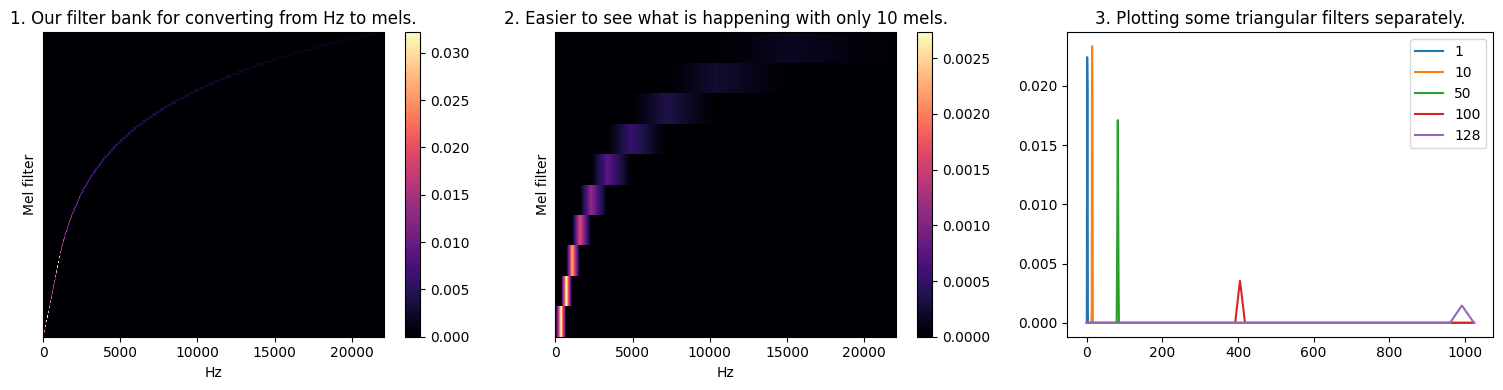

In [33]:
# set the custom parameter
sr = None # target sampling rate, 'None' uses the native sampling rate
n_fft = 2048
hop_length = 512
n_mels = 128
fmin = 20
fmax = 8300
top_db = 80

# read the wav file
wav,sr = librosa.load(file_path,sr=sr)

# set the maximun audio length equal to 5 secs
if wav.shape[0]<5*sr:
    wav = np.pad(wav,int(np.ceil((5*sr-wav.shape[0])/2)),mode='reflect')
else:
    wav = wav[:5*sr]

spec = librosa.feature.melspectrogram(y=wav, sr=sr, n_fft=n_fft, hop_length=hop_length, n_mels=n_mels,fmin=fmin,fmax=fmax)
spec_db = librosa.power_to_db(spec,top_db=top_db)

librosa.display.specshow(spec_db, sr=sr, hop_length=hop_length, x_axis='time', y_axis='log');
plt.colorbar(format='%+2.0f dB')


# show the mel filter
n_mels = 128
plt.figure(figsize=(15, 4));
plt.subplot(1, 3, 1)
mel = librosa.filters.mel(sr=sr, n_fft=n_fft, n_mels=n_mels)
librosa.display.specshow(mel, sr=sr, hop_length=hop_length, x_axis='linear')
plt.ylabel('Mel filter')
plt.colorbar()
plt.title('1. Our filter bank for converting from Hz to mels.')

plt.subplot(1, 3, 2)
mel_10 = librosa.filters.mel(sr=sr, n_fft=n_fft, n_mels=10)
librosa.display.specshow(mel_10, sr=sr, hop_length=hop_length, x_axis='linear')
plt.ylabel('Mel filter')
plt.colorbar()
plt.title('2. Easier to see what is happening with only 10 mels.')

plt.subplot(1, 3, 3)
idxs_to_plot = [0, 9, 49, 99, 127]
for i in idxs_to_plot:
    plt.plot(mel[i])
plt.legend(labels=[f'{i+1}' for i in idxs_to_plot])
plt.title('3. Plotting some triangular filters separately.')

plt.tight_layout()


transform input audio to image

In [34]:
eps=1e-6
mean = spec_db.mean()
std = spec_db.std()
spec_norm = (spec_db - mean) / (std + eps) # normalize the spetrum
spec_min, spec_max = spec_norm.min(), spec_norm.max()
spec_scaled = 255 * (spec_norm - spec_min) / (spec_max - spec_min) # rescale to 0~255
spec_scaled = spec_scaled.astype(np.uint8)

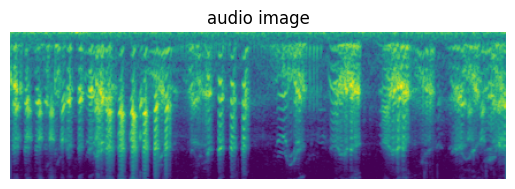

In [35]:
# display the audio image
plt.figure()
plt.title('audio image')
plt.axis('off')
plt.imshow(spec_scaled[np.newaxis,...][0])
plt.show()